Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in data

In [2]:
df = pd.read_csv("USUnemploymentClaims.csv")

In [3]:
df.head()

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000


In [4]:
df

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000
5,2/1/2020,203000,-14000
6,2/8/2020,206000,3000
7,2/15/2020,211000,5000
8,2/22/2020,219000,8000
9,2/29/2020,215000,-4000


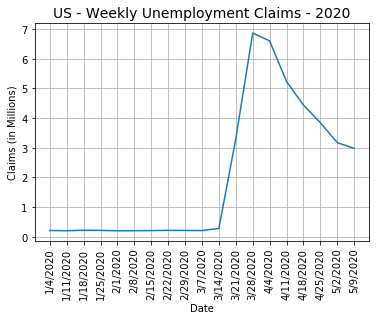

In [5]:
import matplotlib as mpl

#df['Report Date'] = df['Report Date'].str.slice(0, -5)
#print(df['Report Date'][0])

df['ClaimsMil'] = df['Claims']/1000000


plt.plot(df['Report Date'][1:],df['ClaimsMil'][1:])
plt.title("US - Weekly Unemployment Claims - 2020",fontsize=14)
plt.xlabel("Date")

plt.xticks(rotation=90)

plt.ylabel("Claims (in Millions)")
plt.grid()


Text(0, 0.5, 'Claims')

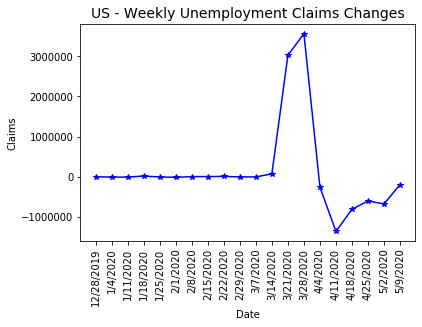

In [6]:
plt.plot(df['Report Date'],df['Change'],'*-b')
plt.title("US - Weekly Unemployment Claims Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Claims")

In [7]:
percentage = [0]
for i in range(1,len(df),1):
#for i in range(1,5,1):
    j = i-1
    delta = (df['Claims'][i]-df['Claims'][j])/(df['Claims'][j])
    delta = round(delta * 100,2)
    #print(round(delta,2))
    percentage.append(delta)
    
df['Percentage'] = percentage

df

,Report Date,Claims,Change,ClaimsMil,Percentage
0,12/28/2019,223000,-2000,0.223,0.00
1,1/4/2020,214000,-9000,0.214,-4.04
2,1/11/2020,205000,-9000,0.205,-4.21
3,1/18/2020,223000,18000,0.223,8.78
4,1/25/2020,217000,-6000,0.217,-2.69
5,2/1/2020,203000,-14000,0.203,-6.45
6,2/8/2020,206000,3000,0.206,1.48
7,2/15/2020,211000,5000,0.211,2.43
8,2/22/2020,219000,8000,0.219,3.79
9,2/29/2020,215000,-4000,0.215,-1.83


Text(0, 0.5, 'Percentage(%)')

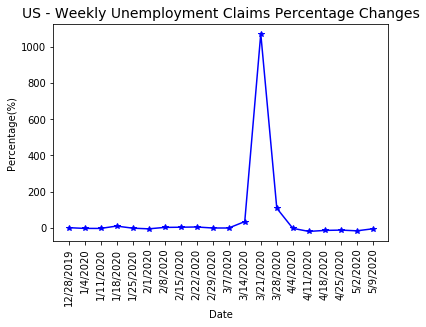

In [8]:
plt.plot(df['Report Date'],df['Percentage'],'*-b')
plt.title("US - Weekly Unemployment Claims Percentage Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Percentage(%)")

In [9]:
totalClaimsCovid19 = df['Claims'][11:].sum()
print("Total unemployment Claims since COVID-19 Outbreak and Shelter in Place in mid-March: {:,}".format(totalClaimsCovid19))

Total unemployment Claims since COVID-19 Outbreak and Shelter in Place in mid-March: 36,744,000
